In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df_original = pd.read_csv('iris_unlabaled.csv')
iris_df = iris_df_original.copy()
iris_df.head()
iris_df.describe()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333,1.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
iris_df = iris_df.drop(['Unnamed: 0'],axis=1)
X = iris_df.drop(['target'],axis=1)
y = iris_df['target']

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)

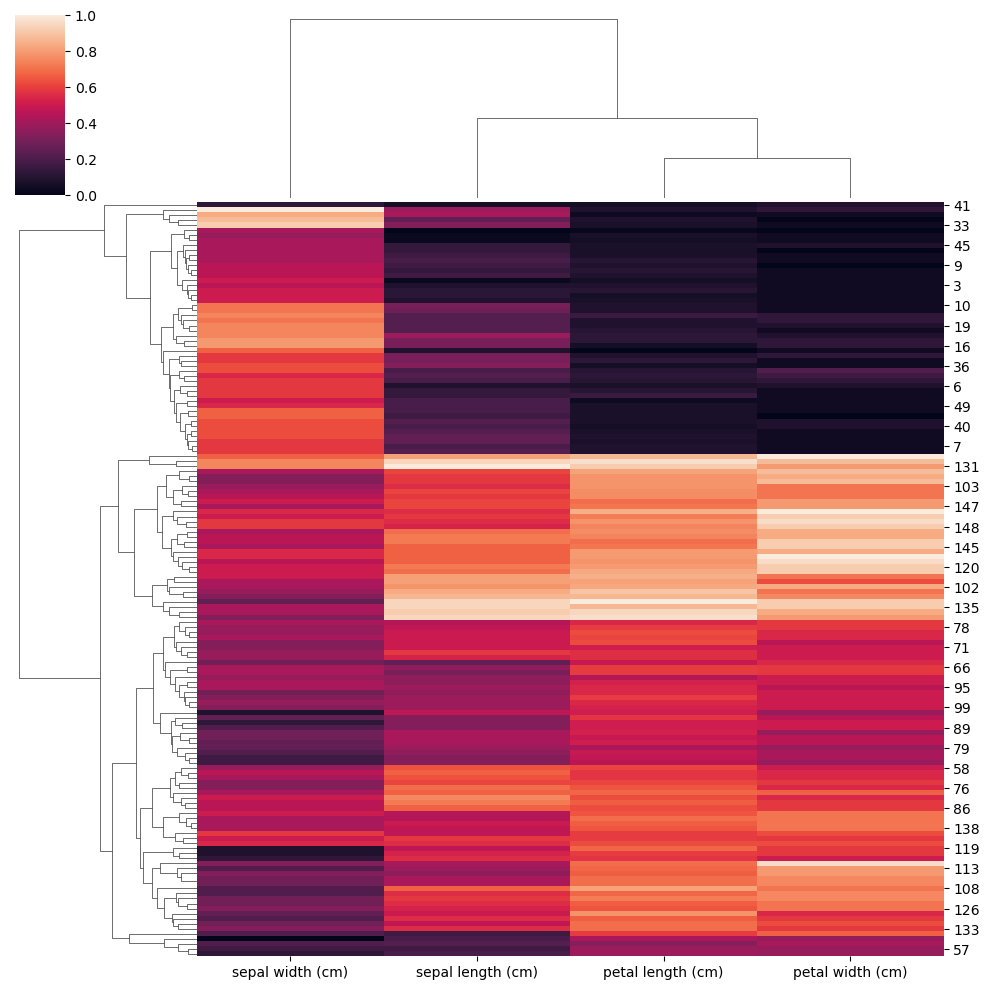

In [5]:
sns.clustermap(data=scaled_X)

In [6]:
df = iris_df[['petal width (cm)','sepal width (cm)']]
corr = df.corr()
print(f'corr value between the two features petal width and sepal width is {corr}')

corr value between the two features petal width and sepal width is                   petal width (cm)  sepal width (cm)
petal width (cm)          1.000000         -0.366126
sepal width (cm)         -0.366126          1.000000


In [7]:
from scipy.cluster.hierarchy import dendrogram,linkage

np.set_printoptions(suppress=True)

linked = linkage(scaled_X,method='ward')
linked


array([[101.        , 142.        ,   0.        ,   2.        ],
       [  7.        ,  39.        ,   0.02777778,   2.        ],
       [ 10.        ,  48.        ,   0.02777778,   2.        ],
       [127.        , 138.        ,   0.03254042,   2.        ],
       [ 17.        ,  40.        ,   0.03254042,   2.        ],
       [  2.        ,  47.        ,   0.03254042,   2.        ],
       [  0.        ,  27.        ,   0.03254042,   2.        ],
       [ 30.        ,  34.        ,   0.03254042,   2.        ],
       [128.        , 132.        ,   0.04166667,   2.        ],
       [  1.        ,  25.        ,   0.04382579,   2.        ],
       [120.        , 143.        ,   0.04382579,   2.        ],
       [ 19.        ,  46.        ,   0.04498205,   2.        ],
       [ 80.        ,  81.        ,   0.04498205,   2.        ],
       [  8.        ,  38.        ,   0.04498205,   2.        ],
       [ 82.        ,  92.        ,   0.04498205,   2.        ],
       [ 96.        ,  99

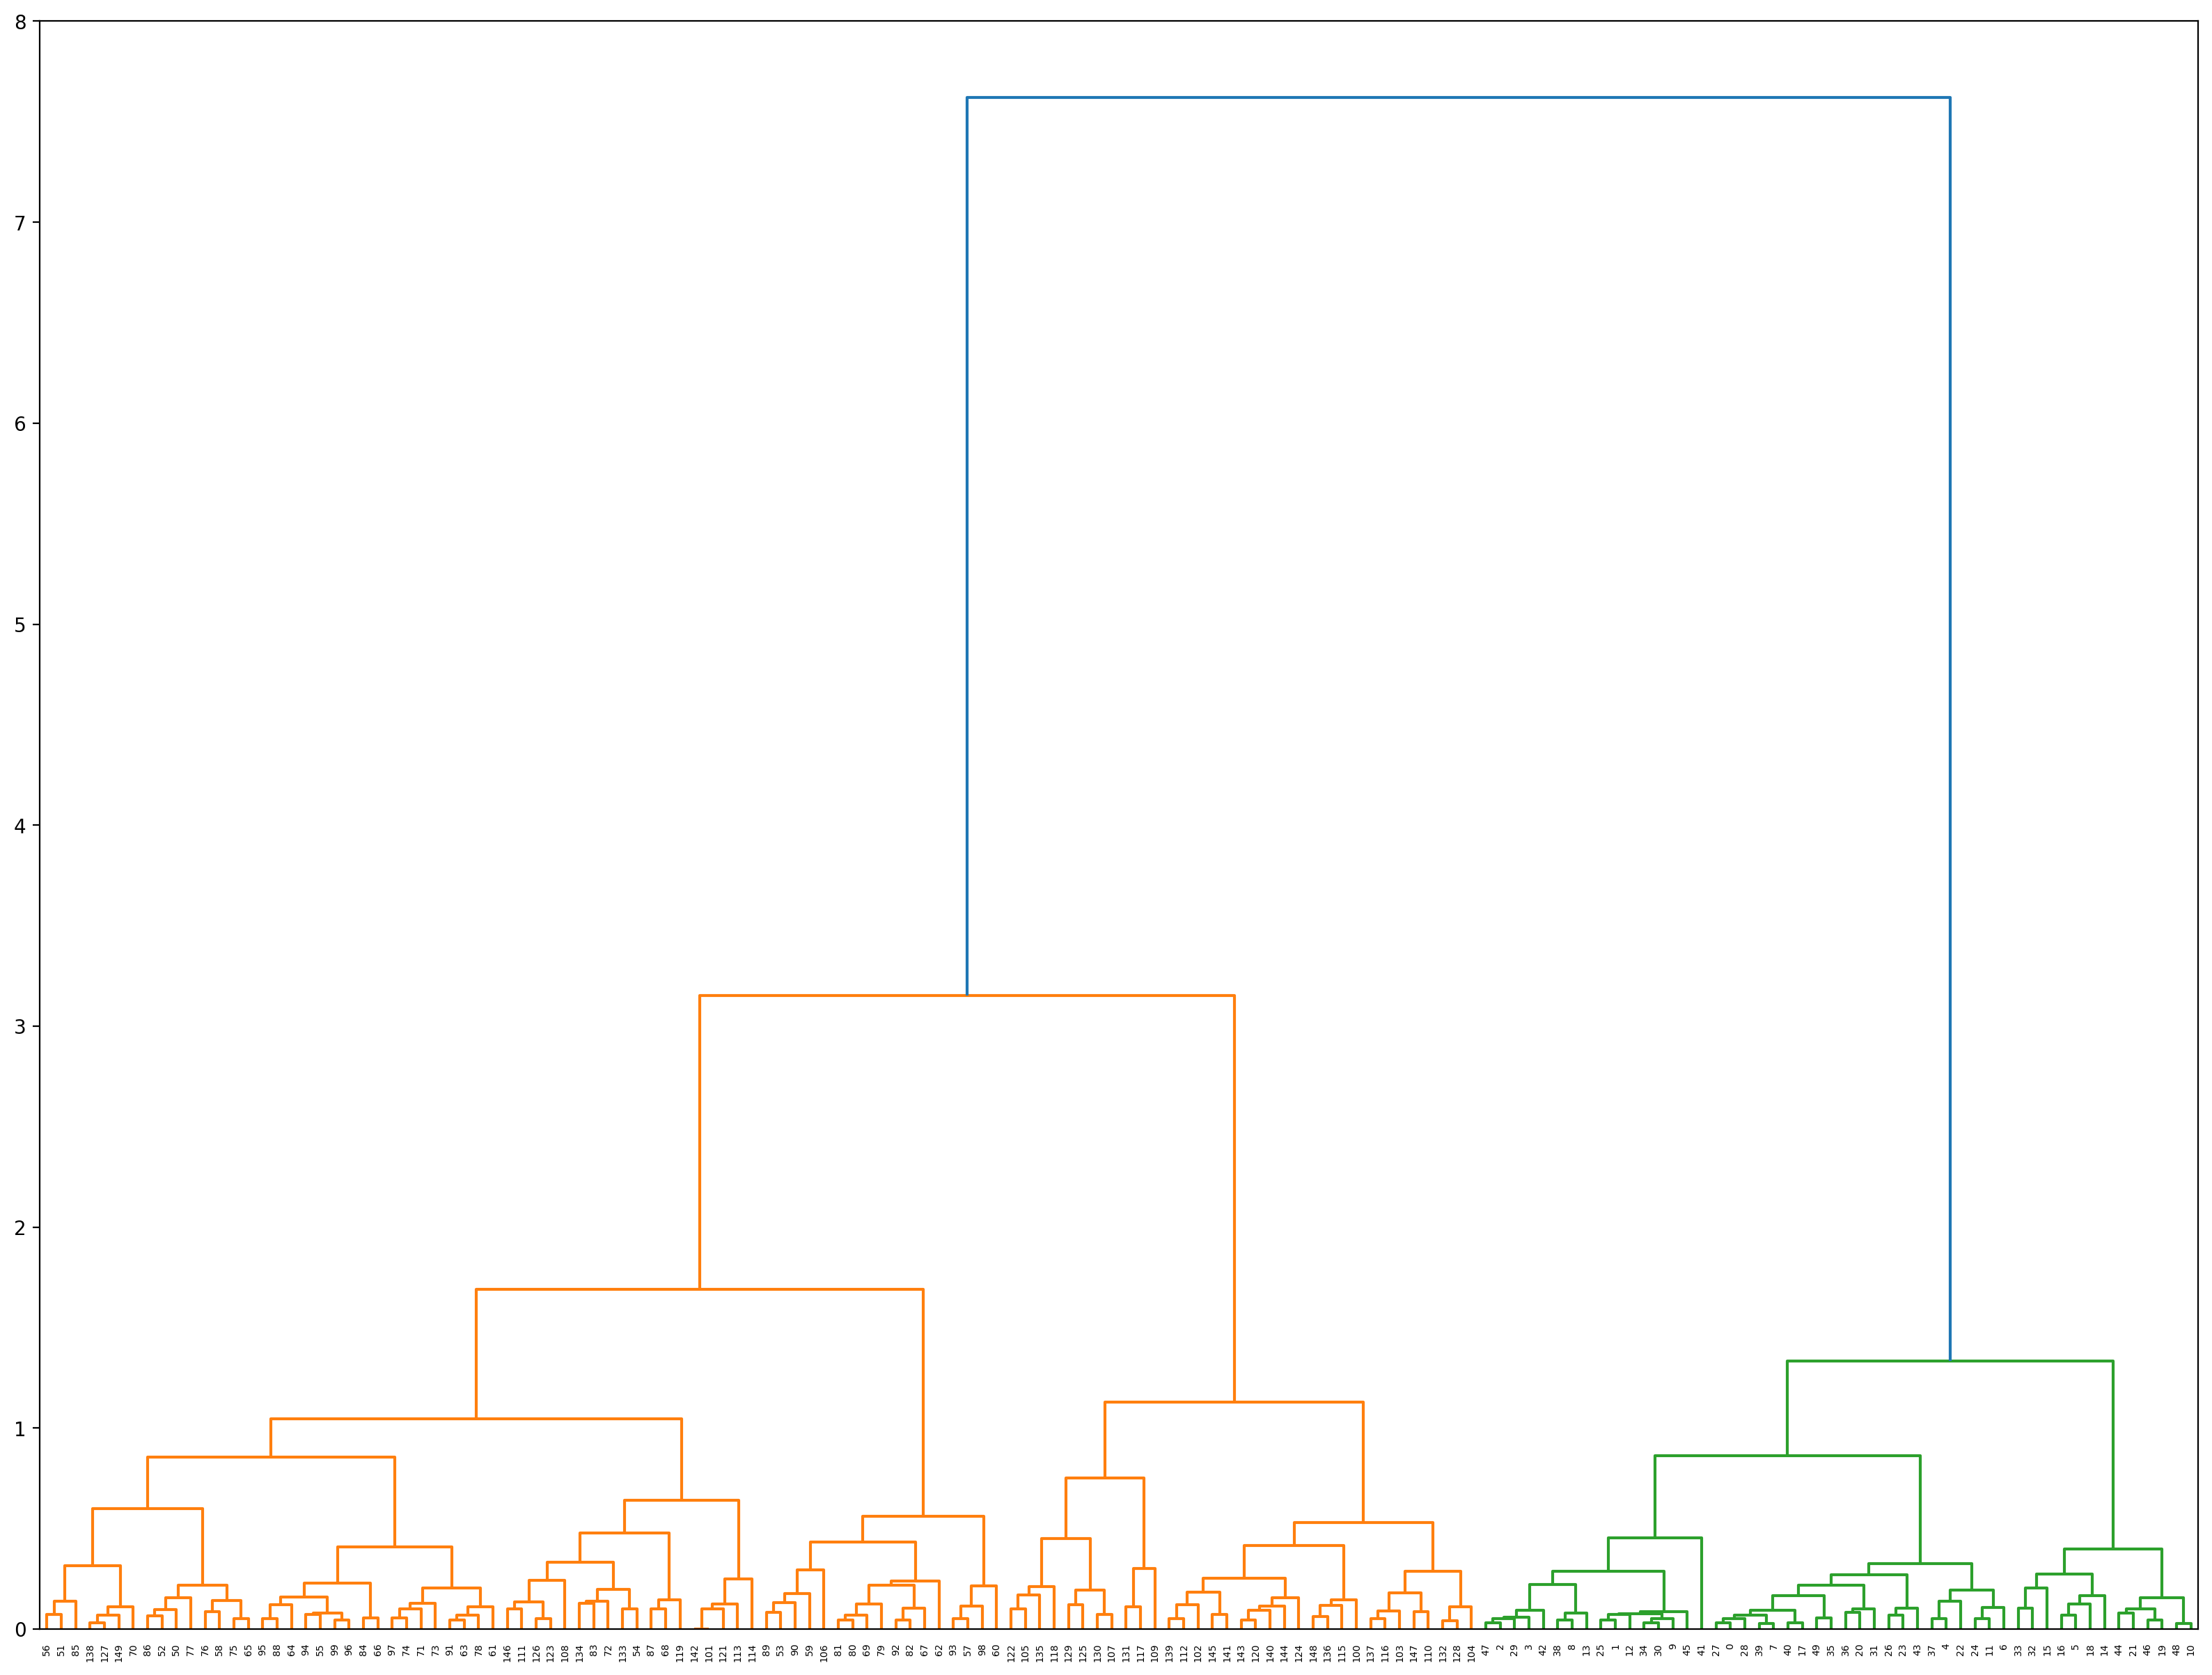

In [8]:
plt.figure(figsize=(20,15), dpi=200)
dendrogram(
    linked,
    orientation='top',
    labels=range(0,len(scaled_X)),
    distance_sort='descending'
)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
cluster_labels = model.fit_predict(scaled_X)
iris_df['target predictions'] = cluster_labels
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target predictions
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


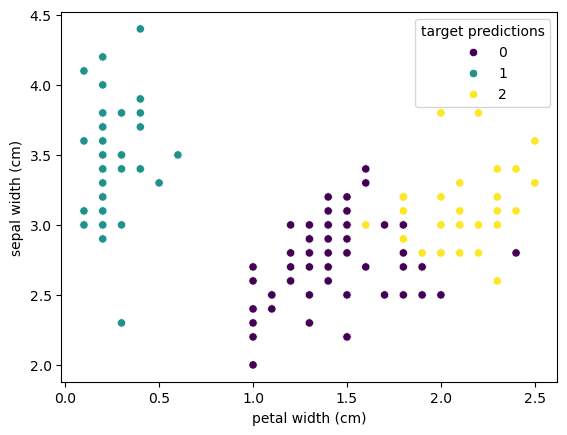

In [10]:
sns.scatterplot(data=iris_df,x='petal width (cm)',y='sepal width (cm)',hue='target predictions',palette='viridis')
plt.show()